## Grupo 7

### Secção 1

### Descrição dos dados
O projeto tem como objetivo analisar o efeito da insulina no músculo esquelético humano. Para isto, biópsias musculares obtidas antes e durante clampes euglicémicos-hiperinsulinémicos de indivíduos sensíveis à insulina. 

Cada amostra (total de 110) corresponde a um paciente, com 12626 medidas disponíveis que correspondem ao mRNA do gene do paciente. Cada paciente é caracterizado por 2 variávies (estado da doença e agente) que são fornecidas no ficheiro de metadados.


#### Leitura do ficheiro de dados e de metadados

In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [474]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

data_set = pd.read_csv("gds3715.csv", index_col=0)
meta_data = pd.read_csv("meta-gds3715.csv", index_col=0)

In [475]:
data_set.head()

,GSM555237,GSM555239,GSM555241,GSM555243,GSM555245,GSM555247,GSM555249,GSM555251,GSM555253,GSM555255,...,GSM555328,GSM555330,GSM555332,GSM555334,GSM555336,GSM555338,GSM555340,GSM555342,GSM555344,GSM555346
1000_at,9.47197,9.74422,9.39861,9.47081,9.51046,9.55608,9.43046,9.42276,9.62158,9.60610,...,9.50314,9.54907,9.54852,9.50661,9.25694,9.53399,9.25747,9.28345,9.50694,9.32879
1001_at,8.07568,8.36888,8.11010,8.26302,8.32918,8.04327,8.00928,8.12348,7.80472,8.31533,...,8.10220,8.14715,8.29711,8.46473,7.87175,8.25165,7.69439,7.86263,8.44435,7.76580
1002_f_at,7.33523,7.50925,7.48819,7.49526,7.42857,7.43269,7.51676,7.29152,7.37745,7.24886,...,7.17414,7.33717,7.31746,7.37310,7.03650,7.16885,7.12184,6.93876,7.19596,7.10649
1003_s_at,9.47628,9.62127,9.45165,9.48732,9.37714,9.55056,9.51935,9.54308,9.37400,9.45150,...,9.28389,9.38620,9.46976,9.26532,9.11653,9.26911,9.20385,9.26302,9.24493,9.12385
1004_at,8.79882,9.14707,9.01776,9.15347,9.06630,9.14434,9.06024,8.94907,9.20602,9.06941,...,8.79236,8.88618,8.80036,8.99845,8.56096,8.87397,8.72164,8.86822,8.76654,8.50369


In [476]:
meta_data.head()

,sample,disease.state,agent,description
GSM555237,GSM555237,insulin sensitive,untreated,Value for GSM555237: a10a.000606jd.2.SkMNor907...
GSM555239,GSM555239,insulin sensitive,untreated,Value for GSM555239: a10a.000606jd.2.SkMNor911...
GSM555241,GSM555241,insulin sensitive,untreated,Value for GSM555241: Run1.a10a.000607jd.2.SkMN...
GSM555243,GSM555243,insulin sensitive,untreated,Value for GSM555243: Run1.a10a.000607jd.2.SkMN...
GSM555245,GSM555245,insulin sensitive,untreated,Value for GSM555245: Run1.a10a.000607jd.2.SkMN...


Como serão aplicados modelos de Machine Learning aos dados, é necessário que os genes, que representam as características em análise, estejam nas colunas. Portanto, o conjunto de dados precisa ser transposto.

In [477]:
data_set = data_set.transpose()
data_set.head()

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
GSM555237,9.47197,8.07568,7.33523,9.47628,8.79882,10.17860,7.04276,9.68760,11.7491,12.2487,...,8.10963,8.24015,6.82856,6.15432,7.52008,7.36990,6.70451,6.88676,6.52184,7.24694
GSM555239,9.74422,8.36888,7.50925,9.62127,9.14707,9.56436,6.97457,10.06410,11.2478,11.6496,...,7.65618,7.74903,6.57203,5.88055,7.63682,7.16841,6.73947,6.56266,6.41881,6.91550
GSM555241,9.39861,8.11010,7.48819,9.45165,9.01776,9.90201,6.92717,9.82471,11.7372,11.8027,...,8.27807,8.11228,7.03743,6.44215,7.73843,7.28745,6.98473,6.95697,6.66408,7.41208
GSM555243,9.47081,8.26302,7.49526,9.48732,9.15347,9.92112,7.01103,10.09450,11.8627,12.0252,...,7.91000,7.97068,6.89846,6.13764,7.59757,7.53081,6.31709,6.76735,6.89247,7.06424
GSM555245,9.51046,8.32918,7.42857,9.37714,9.06630,9.95413,6.95235,9.90423,11.5725,12.1435,...,7.97884,7.85598,6.91625,6.31278,7.66934,7.36681,6.74076,6.83461,6.37602,7.00359


#### Exploração dos dados

In [478]:
#Exploração por genes
data_set.describe()

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,9.433375,8.137768,7.249281,9.313599,8.921853,10.166050,6.887088,9.794328,11.753509,11.960149,...,7.728605,7.692159,6.647234,6.157031,7.315901,7.146825,6.806594,6.719551,6.679924,7.144345
std,0.173506,0.286459,0.174798,0.203006,0.333875,0.409801,0.185361,0.280446,0.323999,0.392596,...,0.362514,0.342224,0.290526,0.232761,0.279111,0.284752,0.326818,0.302805,0.342735,0.313338
min,8.727980,6.856040,6.799770,8.884460,8.136820,9.087930,6.364770,8.145820,9.923840,8.889030,...,6.790640,6.862170,5.830750,5.567290,6.527080,6.342360,6.003730,5.844350,5.863390,6.191120
25%,9.338400,7.989870,7.137645,9.185415,8.720905,9.899745,6.770060,9.638288,11.642075,11.864950,...,7.474612,7.452592,6.494048,6.022815,7.157235,6.976488,6.603220,6.517505,6.497662,6.955513
50%,9.461525,8.120410,7.214910,9.275770,8.855355,10.108550,6.888730,9.841580,11.793750,12.011600,...,7.676520,7.680100,6.633285,6.143125,7.307245,7.171265,6.761415,6.707940,6.622075,7.113575
75%,9.517385,8.311505,7.372125,9.448535,9.061335,10.365850,6.973603,9.950172,11.952225,12.170000,...,7.920230,7.935722,6.810230,6.287793,7.472637,7.296510,7.023505,6.906293,6.764705,7.300192
max,10.118200,9.161650,7.833590,10.319400,10.338700,11.428200,7.629090,10.322700,12.277500,12.483500,...,8.672780,8.576580,7.707790,7.015970,8.745280,8.130270,7.539870,7.754020,9.056460,8.194940


In [479]:
#Exploração por amostras
data_set.transpose().describe()

,GSM555237,GSM555239,GSM555241,GSM555243,GSM555245,GSM555247,GSM555249,GSM555251,GSM555253,GSM555255,...,GSM555328,GSM555330,GSM555332,GSM555334,GSM555336,GSM555338,GSM555340,GSM555342,GSM555344,GSM555346
count,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,...,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000
mean,8.351632,8.339648,8.340489,8.337528,8.331623,8.331028,8.326195,8.337964,8.347741,8.347889,...,8.343241,8.354708,8.325371,8.346193,8.339368,8.351220,8.341171,8.345277,8.347602,8.294715
std,1.709724,1.732502,1.706756,1.714488,1.725388,1.706533,1.723287,1.720769,1.707894,1.743823,...,1.739923,1.707750,1.694778,1.725379,1.722826,1.724360,1.720240,1.719404,1.715259,1.682770
min,5.300560,5.469590,5.352320,5.389880,5.384100,5.396070,5.386270,5.461560,5.424170,5.404920,...,5.489260,5.476240,5.522280,5.460750,5.504740,5.488880,5.486840,5.461950,5.497070,5.516910
25%,6.904590,6.859005,6.893133,6.891015,6.867978,6.882172,6.867035,6.887220,6.891763,6.863397,...,6.880667,6.916680,6.901943,6.897327,6.893460,6.896232,6.894448,6.903012,6.896160,6.886370
50%,8.254115,8.185875,8.220465,8.193855,8.189805,8.194865,8.193765,8.210535,8.208295,8.209410,...,8.228225,8.240520,8.209440,8.240035,8.222130,8.240020,8.219490,8.243005,8.230275,8.158200
75%,9.538625,9.540303,9.540352,9.531710,9.533740,9.537885,9.527832,9.530825,9.532010,9.550745,...,9.505677,9.504677,9.457500,9.505867,9.485205,9.511518,9.488972,9.494372,9.506920,9.424188
max,15.194100,15.209900,15.145600,15.182000,15.158400,15.159100,15.161200,15.218300,15.255600,15.264000,...,15.256900,15.274700,15.277500,15.256200,15.273400,15.255200,15.289600,15.287500,15.291300,15.299400


In [480]:
meta_data.groupby('disease.state').size()

disease.state
diabetic             30
insulin resistant    40
insulin sensitive    40
dtype: int64

In [481]:
meta_data.groupby('agent').size()

agent
insulin      55
untreated    55
dtype: int64

#### Verificação de missing values

In [482]:
data_set.isnull().sum().sum()

0

In [483]:
meta_data.isnull().sum().sum()

0

#### Exploração gráfica

<Axes: >

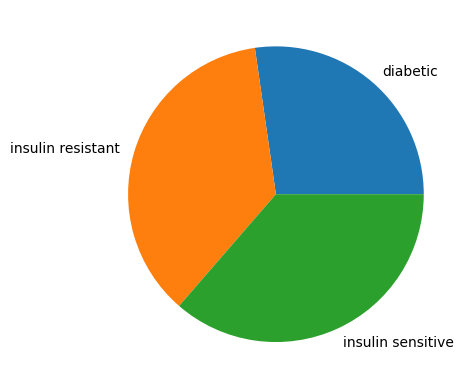

In [484]:
meta_data.groupby("disease.state").size().plot.pie()

<Axes: >

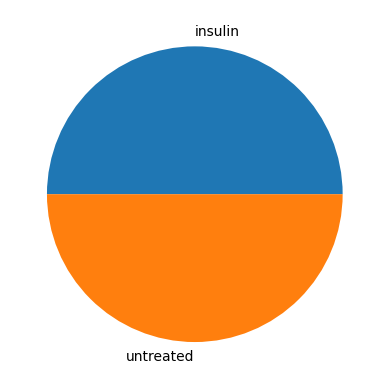

In [485]:
meta_data.groupby("agent").size().plot.pie()

### Secção 2

#### Redução da dimensionalidade de acordo com a expressão genética diferencial

In [486]:
input_data = data_set.values

Selecionar os genes com valores de p-value menores que 0.01 (valor presente na literatura):

* Variável: tipo de doença (f_classif: ANOVA)

In [487]:
from sklearn.feature_selection import SelectPercentile, f_classif


selector = SelectPercentile(f_classif, percentile=10)

output_disease = meta_data.values[:,1]

selector.fit_transform(data_set, output_disease)
genes_de = np.where(selector.pvalues_ <0.01)

print(data_set.columns[genes_de])

Index(['1007_s_at', '1008_f_at', '1009_at', '1012_at', '1013_at', '1018_at',
       '1023_at', '1027_at', '1028_at', '1029_s_at',
       ...
       'AFFX-HUMRGE/M10098_M_at', 'AFFX-HUMTFRR/M11507_M_at', 'AFFX-LysX-3_at',
       'AFFX-LysX-5_at', 'AFFX-LysX-M_at', 'AFFX-M27830_5_at',
       'AFFX-M27830_M_at', 'AFFX-PheX-3_at', 'AFFX-PheX-M_at',
       'AFFX-ThrX-5_at'],
      dtype='object', length=6260)


* Variável: tratamento ou não com insulina (f_classif: t-test)

In [488]:
from sklearn.feature_selection import SelectPercentile, f_classif


selector = SelectPercentile(f_classif, percentile=10)

output_treatment = meta_data.values[:,2]

selector.fit_transform(data_set, output_treatment)
genes_tr = np.where(selector.pvalues_ <0.01)

print(data_set.columns[genes_tr])

Index(['1005_at', '1052_s_at', '1081_at', '1171_s_at', '1176_at', '1191_s_at',
       '1199_at', '1235_at', '1237_at', '1244_at',
       ...
       '875_g_at', '911_s_at', '924_s_at', '934_at', '973_at', '974_at',
       'AFFX-BioB-5_at', 'AFFX-LysX-3_at', 'AFFX-LysX-5_at', 'AFFX-LysX-M_at'],
      dtype='object', length=297)


### Secção 3

### Modelos de Machine Learning

#### Normalização dos dados

In [489]:
from sklearn import preprocessing

input_sc = preprocessing.scale(input_data)

print("Average: ", input_sc.mean())
print("Standard Deviation: ", input_sc.std())

Average:  -9.331609737672788e-18
Standard Deviation:  1.0000000000000002


Para os modelos testados, somente são considerados os genes que foram identificados como diferencialmente expressos em relação ao tipo de doença ou ao tratamento com insulina, uma vez que a inclusão de todos os genes pode causar em uma pior performance dos modelos de Machine Learning.

Além disso, para cada modelo serão aplicados 2 métodos de partição de dados: Hold-Out Sample com 70% de dados para treino e 30% para teste e Cross-Validation com 5 folds.

##### Variável: tipo de doença 

In [490]:
input_sc_filt2 = input_sc[:,genes_de[0]]

print(input_sc_filt2.shape)

(110, 6260)


1. Hold-out Sample: 70% treino e 30% teste

In [491]:
from sklearn.model_selection import train_test_split

# 2/3 of samples for the train set; 1/3 for the train set;
train_in, test_in, train_out, test_out = train_test_split(input_sc_filt2, output_disease, test_size=1/3, random_state=32,  stratify=output_disease)

* K-Nearest Neighbors (KNN)

In [492]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds = knn.predict(test_in)


print("Correct Predition Percentage: ", (preds == test_out).sum()/len(preds) )
print("Precision: ", precision_score(test_out, preds, average='micro') )

print(confusion_matrix(test_out, preds))

Correct Predition Percentage:  0.7297297297297297
Precision:  0.7297297297297297
[[9 1 0]
 [4 9 0]
 [1 4 9]]


* Decision Tree (DT)

In [493]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Correct Predition Percentage: ", (preds_tree == test_out).sum()/len(preds_tree) )
print("Confusion Matrix: ")
print(confusion_matrix(test_out, preds_tree) )
print("Precision: ", precision_score(test_out, preds_tree, average='micro') )


Correct Predition Percentage:  0.7297297297297297
Confusion Matrix: 
[[ 8  2  0]
 [ 5  6  2]
 [ 0  1 13]]
Precision:  0.7297297297297297


* Random Forest

In [494]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_in, train_out)
preds = rf.predict(test_in)
print("Correct Predition Percentage: ", (preds == test_out).sum()/len(preds) )
print("Confusion Matrix: ")
print(confusion_matrix(test_out, preds))
print("Precision: ", precision_score(test_out, preds, average='micro') )


Correct Predition Percentage:  0.7567567567567568
Confusion Matrix: 
[[10  0  0]
 [ 4  8  1]
 [ 1  3 10]]
Precision:  0.7567567567567568


2. Cross Validation (5 folds)

- K-Nearest Neighbors (KNN)

In [495]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
cv_scores = cross_val_score(knn, input_sc_filt2, output_disease, cv=5)
precision = cross_val_score(rf, input_sc_filt2, output_disease, cv=5, scoring='precision_micro')

print(cv_scores)
print(cv_scores.mean())
print(precision)
print(precision.mean())


[0.81818182 0.81818182 0.72727273 0.86363636 0.59090909]
0.7636363636363637
[0.86363636 0.81818182 0.90909091 0.72727273 0.59090909]
0.7818181818181819


* Decision Tree (DT)

In [496]:
tree_model = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(tree_model, input_sc_filt2, output_disease, cv=5)
precision = cross_val_score(rf, input_sc_filt2, output_disease, cv=5, scoring='precision_micro')

print(cv_scores)
print(cv_scores.mean())
print(precision)
print(precision.mean())

[0.77272727 0.86363636 0.77272727 0.63636364 0.59090909]
0.7272727272727273
[0.86363636 0.81818182 0.86363636 0.81818182 0.63636364]
0.8


* Random Forest

In [497]:
rf = RandomForestClassifier()
cv_scores = cross_val_score(rf, input_sc_filt2, output_disease, cv=5)
precision = cross_val_score(rf, input_sc_filt2, output_disease, cv=5, scoring='precision_micro')

print(cv_scores)
print(cv_scores.mean())
print(precision)
print(precision.mean())

[0.81818182 0.81818182 0.95454545 0.77272727 0.59090909]
0.7909090909090908
[0.86363636 0.77272727 0.90909091 0.77272727 0.59090909]
0.7818181818181819


#### Variável: tratamento ou não com insulina

In [498]:
input_sc_filt2 = input_sc[:,genes_tr[0]]

print(input_sc_filt2.shape)

(110, 297)


1. Hold-out Sample: 70% treino e 30% teste

In [499]:
from sklearn.model_selection import train_test_split

# 2/3 of samples for the train set; 1/3 for the train set;
train_in, test_in, train_out, test_out = train_test_split(input_sc_filt2, output_disease, test_size=1/3, random_state=32,  stratify=output_disease)

* K-Nearest Neighbors (KNN)

In [500]:
knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds = knn.predict(test_in)


print("Correct Predition Percentage: ", (preds == test_out).sum()/len(preds) )
print(confusion_matrix(test_out, preds))
print("Precision: ", precision_score(test_out, preds, average='micro') )

Correct Predition Percentage:  0.6486486486486487
[[ 7  2  1]
 [ 4  7  2]
 [ 1  3 10]]
Precision:  0.6486486486486487


* Decision Tree (DT)

In [501]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Correct Predition Percentage: ", (preds_tree == test_out).sum()/len(preds_tree) )
print("Confusion Matrix: ")
print(confusion_matrix(test_out, preds_tree) )
print("Precision: ", precision_score(test_out, preds_tree, average='micro') )

Correct Predition Percentage:  0.6216216216216216
Confusion Matrix: 
[[6 3 1]
 [4 8 1]
 [3 2 9]]
Precision:  0.6216216216216216


* Random Forest

In [502]:
rf = RandomForestClassifier()
rf.fit(train_in, train_out)
preds = rf.predict(test_in)
print("Correct Predition Percentage: ", (preds == test_out).sum()/len(preds) )
print("Confusion Matrix: ")
print(confusion_matrix(test_out, preds))
print("Precision: ", precision_score(test_out, preds, average='micro') )

Correct Predition Percentage:  0.7027027027027027
Confusion Matrix: 
[[ 7  3  0]
 [ 3 10  0]
 [ 0  5  9]]
Precision:  0.7027027027027027


2. Cross-Validation (5 folds)

* K-Nearest Neighbors (KNN)

In [503]:
knn = KNeighborsClassifier()
cv_scores = cross_val_score(knn, input_sc_filt2, output_disease, cv=5)
precision = cross_val_score(rf, input_sc_filt2, output_disease, cv=5, scoring='precision_micro')

print(cv_scores)
print(cv_scores.mean())
print(precision)
print(precision.mean())

[0.68181818 0.68181818 0.63636364 0.5        0.5       ]
0.6
[0.72727273 0.77272727 0.63636364 0.72727273 0.54545455]
0.6818181818181818


* Decision Tree (DT)

In [504]:
tree_model = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(tree_model, input_sc_filt2, output_disease, cv=5)
precision = cross_val_score(rf, input_sc_filt2, output_disease, cv=5, scoring='precision_micro')

print(cv_scores)
print(cv_scores.mean())
print(precision)
print(precision.mean())

[0.68181818 0.63636364 0.63636364 0.63636364 0.59090909]
0.6363636363636364
[0.86363636 0.72727273 0.68181818 0.86363636 0.59090909]
0.7454545454545454


* Random Forest 

In [505]:
rf = RandomForestClassifier()
cv_scores = cross_val_score(rf, input_sc_filt2, output_disease, cv=5)
precision = cross_val_score(rf, input_sc_filt2, output_disease, cv=5, scoring='precision_micro')

print(cv_scores)
print(cv_scores.mean())
print(precision)
print(precision.mean())

[0.81818182 0.77272727 0.5        0.72727273 0.68181818]
0.7
[0.86363636 0.72727273 0.54545455 0.72727273 0.68181818]
0.709090909090909


#### Conclusão

O modelo de Machine Learning que apresentou melhor resultado foi o algoritmo de Random Forest com a utilização dos genes diferencialmemte expressos em relação ao tipo de doença e com a partição de dados por Cross-Validation (5 folds). Este modelo apresentou uma acurácia de 79% e precisão de 78,18%. Portanto, pode-se concluir que, com o dataset utilizado e sua respetiva preparação, é possível desenvolver um modelo de ML que consegue prever qual o estado da doença que o paciente se encontra (diabético, sensível à insulina ou resistente à insulina) a partir das expressões genéticas recolhidas.

##### Créditos

Todos os elementos do grupo participaram de forma igualitária no desenvolvimento do projeto.